# Simple linear regression model 

## Import the relevant libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

## Load the data

In [2]:
data = pd.read_csv('C:/Users/aleksandar.dimitrov/Desktop/Python Tests/1.01. Simple linear regression.csv')


In [3]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


## Linear Regression Creating

##### SAT = Critical Reading + Mathematics + Writing 
##### GPA = Grade point average (at graduation from university)
##### We will create a linear regression which predicts GPA based on the SAT score obtained 

### Define the dependand and the independant variables
$$y = b_0 + b_1 x_1$$

In [5]:
y = data['GPA']
x1 = data['SAT']

### Data exploration

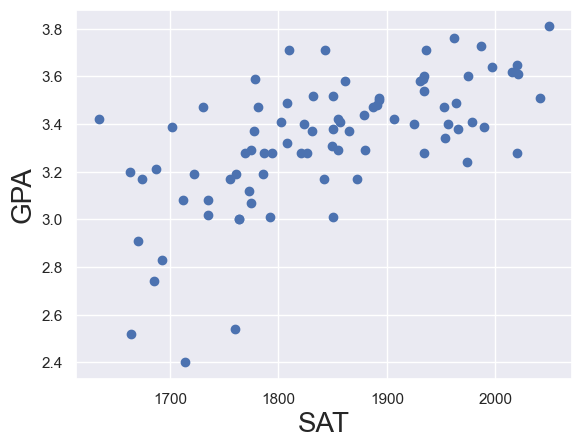

In [6]:
plt.scatter(x1,y)
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

### Regression itself

In [7]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Fri, 05 May 2023   Prob (F-statistic):           7.20e-11
Time:                        19:26:08   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

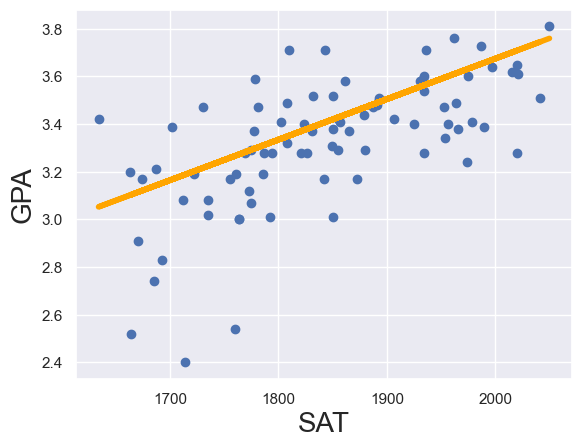

In [8]:
plt.scatter(x1, y)
yhat = 0.0017*x1 + 0.275
fig = plt.plot(x1, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

## Load the categorical data

In [9]:
categorical_data = pd.read_csv('C:/Users/aleksandar.dimitrov/Desktop/Python Tests/1.03. Dummies.csv')

In [10]:
categorical_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [11]:
cdata = categorical_data.copy()

In [12]:
cdata['Attendance'] = cdata['Attendance'].map({'Yes': 1, 'No': 0})

In [13]:
cdata

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [14]:
cdata.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


### Regression 

In [15]:
y = cdata['GPA']
x1 = cdata[['SAT', 'Attendance']]

In [16]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Fri, 05 May 2023   Prob (F-statistic):           2.19e-15
Time:                        19:26:08   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### We have two equations that have the same slope but different intercept

GPA = 0.8665 + 0.0014 * SAT

GPA = 0.6439 + 0.0014 * SAT 


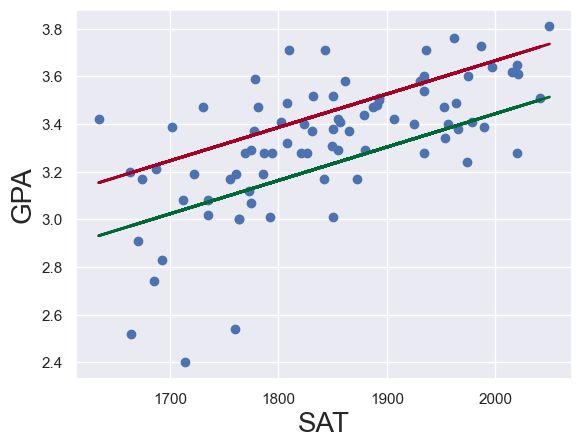

In [17]:
plt.scatter(cdata['SAT'], y)
yhat_no = 0.6439 + 0.0014*cdata['SAT']
yhat_yes = 0.8665 + 0.0014*cdata['SAT']
fig = plt.plot(cdata['SAT'], yhat_no, lw=2, c='#006837')
fig = plt.plot(cdata['SAT'], yhat_yes, lw=2, c='#a50026')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show() 

## Predictions based on the regressions we created above 

In [18]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


### We create a data frame which we use for the predictions pusposes 

In [19]:
new_data = pd.DataFrame({'const':1, 'SAT':[1700,1670], 'Attendance':[0,1]})
new_data = new_data[['const', 'SAT','Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [20]:
new_data.rename(index={0:'Kalin', 1:'Stefania'})

,const,SAT,Attendance
Kalin,1,1700,0
Stefania,1,1670,1


In [21]:
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

### Stefania scored lower on the SAT, but she attended > 75% of lectures

In [22]:
predictionsdf = pd.DataFrame({'Predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename(index={0:'Kalin', 1:'Stefania'})

,const,SAT,Attendance,Predictions
Kalin,1,1700,0,3.023513
Stefania,1,1670,1,3.204163
